# 0.0 IMPORTS

In [49]:
import pandas as pd
import inflection 
import math
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


## 0.01 Helper Funcionts

## 0.02 Loading Data

In [3]:
df_sales_raw = pd.read_csv ('data/train.csv', low_memory=False)
df_store_raw = pd.read_csv ('data/store.csv', low_memory=False)
#Merge
df_raw = pd.merge (df_sales_raw,df_store_raw, how='left', on = 'Store')


# 1.0 DESCRICAO DOS DADOS

In [4]:
#Cópia dos dados da secao anterior - backup caso precise rodar novamente
df1 = df_raw.copy()

# 1.1 Rename Columns

In [5]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [6]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo','StateHoliday', 'SchoolHoliday',                           'StoreType', 'Assortment','CompetitionDistance', 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear', 'Promo2',             'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval']
snakecase = lambda x: inflection.underscore(x)
cols_new = list(map(snakecase,cols_old))
df1.columns = cols_new
                

# 1.2. Date Dimension


In [7]:
print ('Number of rows {}'.    format (df1.shape[0]))
print ('Number of columns {}'. format (df1.shape[1]))



Number of rows 1017209
Number of columns 18


# 1.3 Data Types

In [8]:
#Tranformando o campo data em tipo data
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes 

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

# 1.4 Check NA

In [9]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

# 1.5 Fillout NA

In [10]:
#competition_distance             
df1['competition_distance'] =df1['competition_distance'].apply(lambda x: 200000 if math.isnan(x) else x)

#competition_open_since_month    
df1['competition_open_since_month']= df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis = 1)

#competition_open_since_year     
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year  if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis = 1 )

#promo2_since_week        
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis = 1)

#promo2_since_year
df1['promo2_since_year'] = df1.apply(lambda x : x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis = 1)

#promo_interval            
month_map = {1  : 'Jan',2  : 'Feb',3  : 'Mar',4  : 'Apr',5  : 'May',6  : 'Jun',7  : 'Jul',8  : 'Aug',9  : 'Sep',10 : 'Oct',11 : 'Nov',12 : 'Dec' }

df1['promo_interval'].fillna(0,inplace = True)
df1['month_map'] = df1['date'].dt.month.map(month_map)


#comparando se o mes de venda 'date'está contido no periodo de promocao 'promo_intervale separando os meses da coluna promo_interval com espaco pois estao todos juntos'
df1['is_promo'] =df1[['promo_interval', 'month_map']].apply                                                                            (lambda x: 0 if x['promo_interval'] == 0 else                                                                                             1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis= 1)



In [11]:
df1.sample(5).T

,579235,631824,900602,136722,23313
store,221,405,468,693,1014
day_of_week,2,4,1,2,6
date,2014-01-28 00:00:00,2013-12-12 00:00:00,2013-04-15 00:00:00,2015-03-31 00:00:00,2015-07-11 00:00:00
sales,3906,3942,3427,14521,4796
customers,413,474,464,890,523
open,1,1,1,1,1
promo,0,0,0,1,0
state_holiday,0,0,0,0,0
school_holiday,0,0,0,1,0
store_type,d,a,c,d,a


# 1.6 Change Types


In [12]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype('int64')
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype('int64')
df1['promo2_since_week']= df1['promo2_since_week'].astype('int64')
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype('int64')


In [13]:
df1.sample(5)

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo
338389,112,6,2014-09-13,6135,727,1,0,0,0,a,a,1630.0,9,2009,0,37,2014.0,0,Sep,0
464583,414,7,2014-05-11,0,0,0,0,0,0,d,c,6210.0,5,2014,1,1,2013.0,"Jan,Apr,Jul,Oct",May,0
947576,612,1,2013-03-04,9497,535,1,1,0,0,d,c,2490.0,11,2012,1,31,2009.0,"Jan,Apr,Jul,Oct",Mar,0
581510,266,7,2014-01-26,0,0,0,0,0,0,a,c,360.0,3,2014,1,9,2011.0,"Mar,Jun,Sept,Dec",Jan,0
248257,790,5,2014-12-19,10932,878,1,1,0,0,d,c,9070.0,12,2003,0,51,2014.0,0,Dec,0


# 1.7 Descriptive Statiscal


In [14]:
#Separando os atributos numericos
num_atributes = df1.select_dtypes(include =['int64', 'float64'])

#Separando os atributos categóricos
cat_atributes = df1.select_dtypes(exclude=['int64', 'float64','datetime64[ns]'])


### 1.7.1 Numerical Atributes

In [23]:
#Central Tendency - mean , median
ct1= pd.DataFrame(num_atributes.apply(np.mean)).T
ct2= pd.DataFrame(num_atributes.apply(np.median)).T

#Dispersao : std, min, max, range, skew, kurtosis

d1 = pd.DataFrame(num_atributes.apply(np.std)).T
d2 = pd.DataFrame(num_atributes.apply(min)).T
d3 = pd.DataFrame(num_atributes.apply(max)).T
d4 = pd.DataFrame(num_atributes.apply (lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_atributes.apply (lambda x: x.skew())).T
d6 = pd.DataFrame(num_atributes.apply(lambda x: x.kurtosis())).T


#Concatenar
m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns=['atributes','min','max','range','mean','meadian','std','skew','kurtoses']
m

,atributes,min,max,range,mean,meadian,std,skew,kurtoses
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


### 1.7.2  Gráficos de Dispersão


C:\Users\Jacqueline\.conda\envs\DataSciente_Em_Producao\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


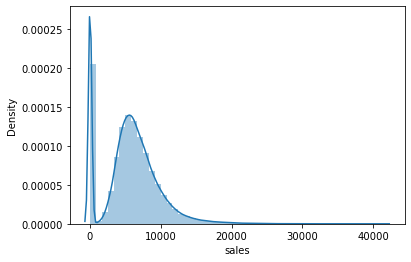

In [40]:
sns.distplot(df1['sales']);



C:\Users\Jacqueline\.conda\envs\DataSciente_Em_Producao\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


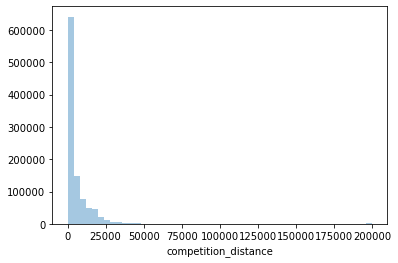

In [42]:
sns.distplot(df1['competition_distance'], kde=False);





In [44]:
### 1.7.1 Categorical Atributes
cat_atributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

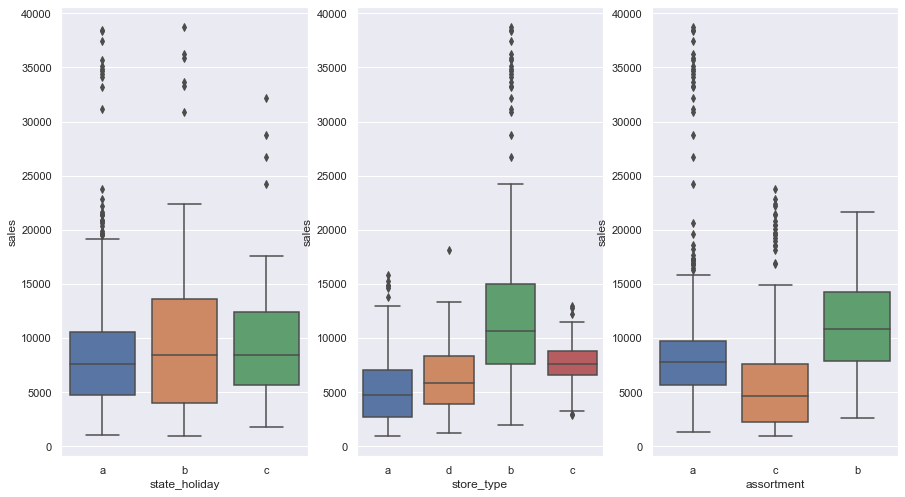

In [52]:
sns.set(rc={'figure.figsize':(15,8.27)})


aux = df1[(df1['state_holiday']!= '0') & (df1['sales']>0)]

plt.subplot (1,3,1)
sns.boxplot(data=aux, x ='state_holiday',y ='sales' )

plt.subplot(1,3,2)

sns.boxplot(data=aux, x= 'store_type', y = 'sales')

plt.subplot(1,3,3)
sns.boxplot(data=aux, x='assortment', y = 'sales' )

